Dataset loaded successfully!
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0        10107         0.263736   0.941193                2  0.175644   
1        10121         0.307692   0.744940                5  0.167916   
2        10134         0.384615   0.928063                2  0.250150   
3        10145         0.428571   0.771061                6  0.240030   
4        10159         0.472527   1.000000               14  0.347273   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2003-02-24  Shipped       1         2     2003  ...   
1  2003-05-07  Shipped       2         5     2003  ...   
2  2003-07-01  Shipped       3         7     2003  ...   
3  2003-08-25  Shipped       3         8     2003  ...   
4  2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY  STATE  \
0        897 Long Airport Avenue           NaN            NYC     NY   
1             59 rue de l'Abbaye       

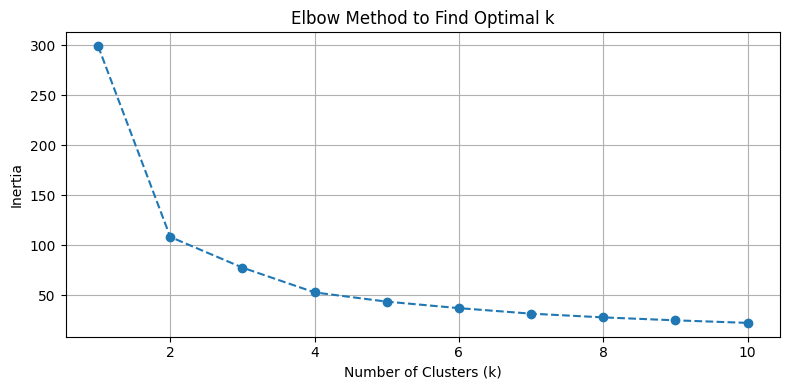

Clustering complete with k = 3

Cluster Group Means:
            SALES  QUANTITYORDERED  PRICEEACH
Cluster                                      
0        0.112386         0.317664   0.420775
1        0.403367         0.412262   0.988825
2        0.199356         0.260163   0.920917


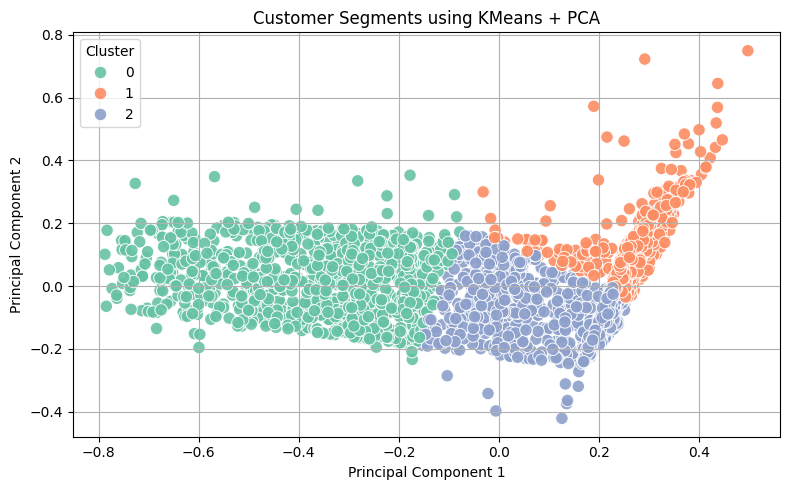

Final dataset saved as data/sales_with_clusters.csv


In [1]:
# clustering_customer_segmentation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the cleaned data from the 'data' folder
df = pd.read_csv('../data/cleaned_sales_data.csv')
print("Dataset loaded successfully!")
print(df.head())

# Step 2: Select features for clustering
# Adjust the feature names as per your cleaned dataset
features = ['SALES', 'QUANTITYORDERED', 'PRICEEACH']

# Validate feature presence
for col in features:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in dataset!")

X = df[features]

# Step 3: Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Features normalized successfully.")

# Step 4: Use Elbow Method to determine optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Choose optimal k (update based on Elbow plot result)
optimal_k = 3  # Change this after viewing elbow plot if needed

# Step 6: Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(f"Clustering complete with k = {optimal_k}")

# Step 7: Analyze clusters
print("\nCluster Group Means:")
print(df.groupby('Cluster')[features].mean())

# Step 8: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA Scatter with Cluster Labels
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=80,
    alpha=0.9
)
plt.title('Customer Segments using KMeans + PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Save final dataset with clusters
df.to_csv('../data/sales_with_clusters.csv', index=False)
print("Final dataset saved as data/sales_with_clusters.csv")
